<a href="https://colab.research.google.com/github/tkdforever18/Carlos/blob/main/Angel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import clear_output

In [76]:
(data,_),(_,_) = tf.keras.datasets.mnist.load_data()
data = np.array(data,"float32")
data = data.reshape(data.shape+(1,))/255
print(data.shape)

(60000, 28, 28, 1)


In [77]:
dataset = tf.data.Dataset.from_tensor_slices(data)
dataset = dataset.batch(1)

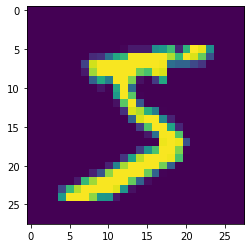

In [78]:
for image in dataset.take(1):
  plt.imshow(tf.squeeze(image))
  plt.show()

In [79]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential,Model

In [19]:
def Upsample(filters,size=4,strides=2):
  init = tf.random_normal_initializer()
  layer = Sequential()
  layer.add(Conv2DTranspose(filters,size,strides,padding="same",kernel_initializer=init))
  layer.add(BatchNormalization())
  layer.add(ReLU())
  return layer

def Downsample(filters,size=4,strides=2):
  init = tf.random_normal_initializer()
  layer = Sequential()
  layer.add(Conv2D(filters,size,strides,padding="same",kernel_initializer=init))
  layer.add(BatchNormalization())
  layer.add(LeakyReLU(0.2))
  return layer

In [88]:
def Generator():
  input_noise = Input(shape=[512,])
  layers = [
      Dense(256*7*7),
      Reshape((7,7,256)),
      Upsample(256,strides=1),
      Upsample(128),#14,14,256
      Upsample(64),#28,28,128
  ]
  last = Conv2DTranspose(1,4,1,padding="same",activation="tanh")
  x = input_noise
  for layer in layers:
    x = layer(x)
  last = last(x)
  return Model(input_noise,last)

In [89]:
def Discriminator():
  input_image = Input(shape=[28,28,1])
  layers = [
      Downsample(64),
      Downsample(128)
  ]
  last = Conv2D(1,4,padding="same")

  x = input_image
  for layer in layers:
    x = layer(x)
  last = last(x)
  return Model(input_image,last)

In [90]:
generator = Generator()
discriminator = Discriminator()

In [91]:
generator.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 512)]             0         
                                                                 
 dense_11 (Dense)            (None, 12544)             6435072   
                                                                 
 reshape_7 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 sequential_28 (Sequential)  (None, 7, 7, 256)         1049856   
                                                                 
 sequential_29 (Sequential)  (None, 14, 14, 128)       524928    
                                                                 
 sequential_30 (Sequential)  (None, 28, 28, 64)        131392    
                                                                 
 conv2d_transpose_24 (Conv2D  (None, 28, 28, 1)        102

In [92]:
discriminator.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 sequential_31 (Sequential)  (None, 14, 14, 64)        1344      
                                                                 
 sequential_32 (Sequential)  (None, 7, 7, 128)         131712    
                                                                 
 conv2d_23 (Conv2D)          (None, 7, 7, 1)           2049      
                                                                 
Total params: 135,105
Trainable params: 134,721
Non-trainable params: 384
_________________________________________________________________


In [93]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4,beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4,beta_1=0.5)

In [94]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [95]:
def generator_loss(fake_out):
  return loss_object(tf.ones_like(fake_out),fake_out)

def discriminator_loss(real_out,fake_out):
  fake_loss = loss_object(tf.zeros_like(fake_out),fake_out)
  real_loss = loss_object(tf.ones_like(real_out),real_out)

  return fake_loss + real_loss

In [96]:
@tf.function
def train_step(real_images):
  noise = tf.random.normal(shape=[1,512])
  with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
    fake_images = generator(noise,training=True)

    fake_out = discriminator(fake_images,training=True)
    real_out = discriminator(real_images,training=True)

    gen_loss = generator_loss(fake_out)
    disc_loss = discriminator_loss(real_out,fake_out)

    gen_grads = gen_tape.gradient(gen_loss,generator.trainable_variables)
    disc_grads = disc_tape.gradient(disc_loss,discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(gen_grads,generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(disc_grads,discriminator.trainable_variables))

In [97]:
def generate_images():
  noise = tf.random.normal(shape=[4,512])
  preds = generator(noise,training=True)
  for n,img in enumerate(preds):
    plt.subplot(2,2,n+1)
    plt.imshow(tf.squeeze(img))
    plt.axis("off")
  plt.show()    

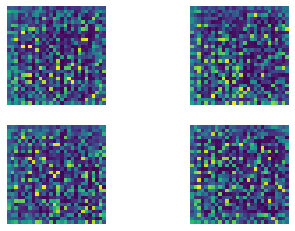

In [98]:
generate_images()

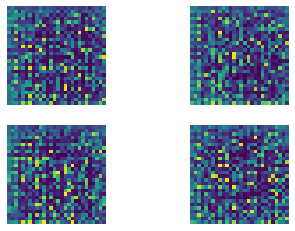

Epoch 1/100
....................................................................................................

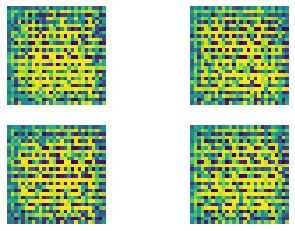

Epoch 2/100
....................................................................................................

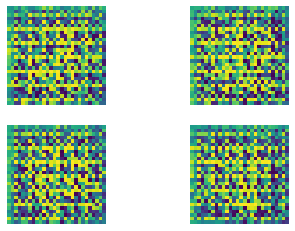

Epoch 3/100
....................................................................................................

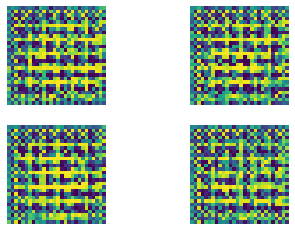

Epoch 4/100
....................................................................................................

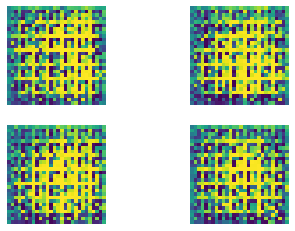

Epoch 5/100
....................................................................................................

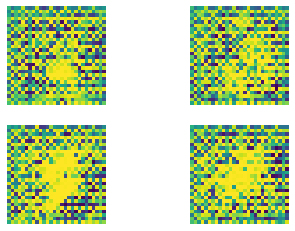

Epoch 6/100
....................................................................................................

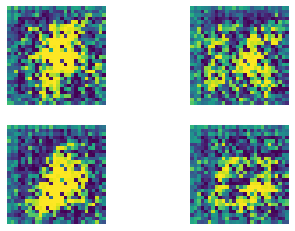

Epoch 7/100
....................................................................................................

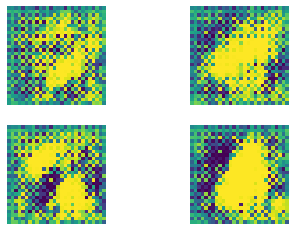

Epoch 8/100
....................................................................................................

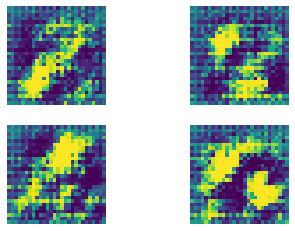

Epoch 9/100
....................................................................................................

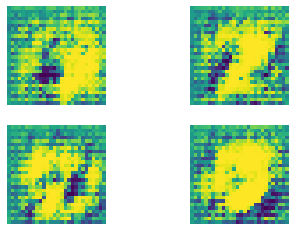

Epoch 10/100
....................................................................................................

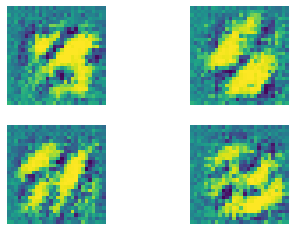

Epoch 11/100
....................................................................................................

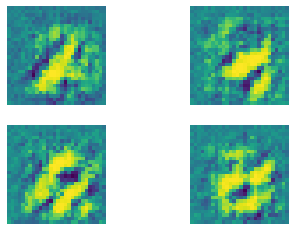

Epoch 12/100
....................................................................................................

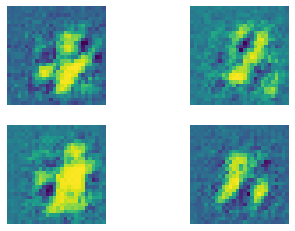

Epoch 13/100
....................................................................................................

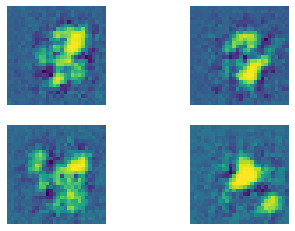

Epoch 14/100
....................................................................................................

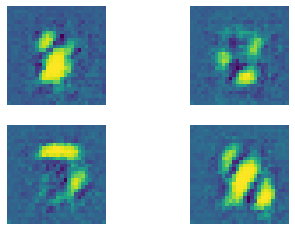

Epoch 15/100
....................................................................................................

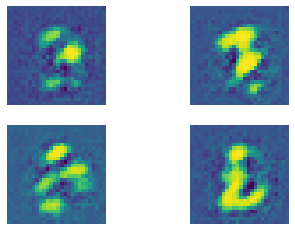

Epoch 16/100
....................................................................................................

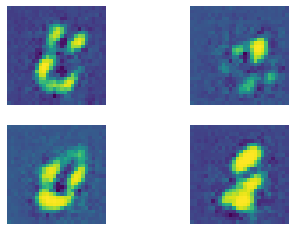

Epoch 17/100
....................................................................................................

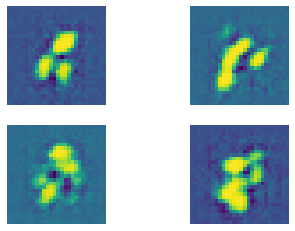

Epoch 18/100
....................................................................................................

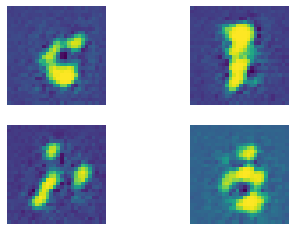

Epoch 19/100
....................................................................................................

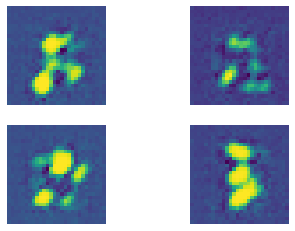

Epoch 20/100
....................................................................................................

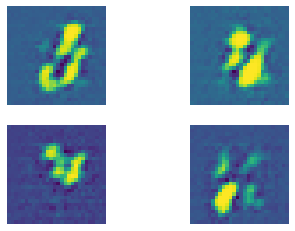

Epoch 21/100
....................................................................................................

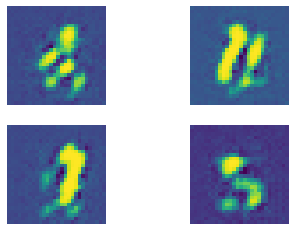

Epoch 22/100
....................................................................................................

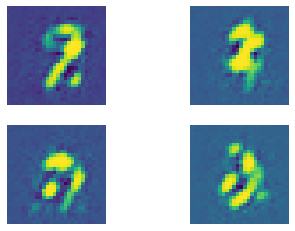

Epoch 23/100
....................................................................................................

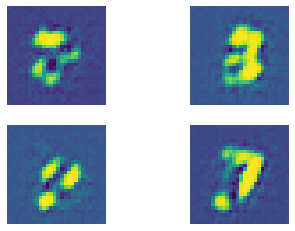

Epoch 24/100
....................................................................................................

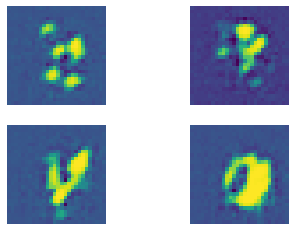

Epoch 25/100
....................................................................................................

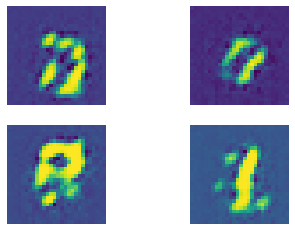

Epoch 26/100
....................................................................................................

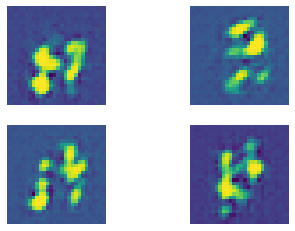

Epoch 27/100
....................................................................................................

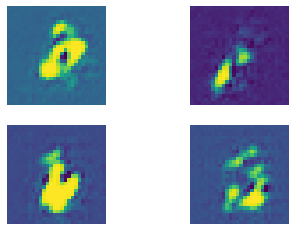

Epoch 28/100
....................................................................................................

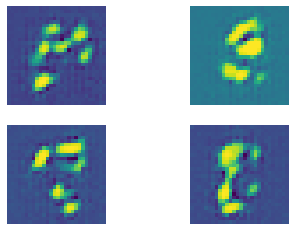

Epoch 29/100
....................................................................................................

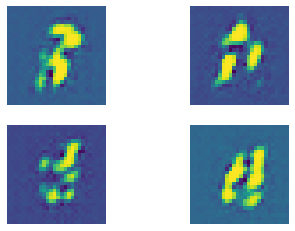

Epoch 30/100
....................................................................................................

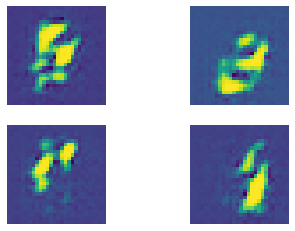

Epoch 31/100
....................................................................................................

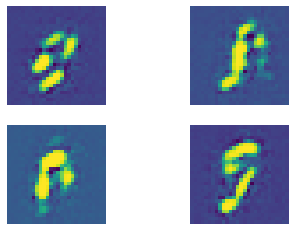

Epoch 32/100
....................................................................................................

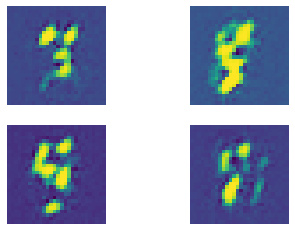

Epoch 33/100
....................................................................................................

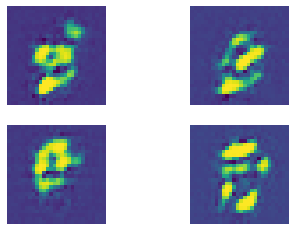

Epoch 34/100
....................................................................................................

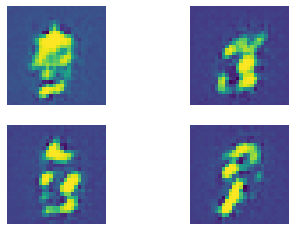

Epoch 35/100
....................................................................................................

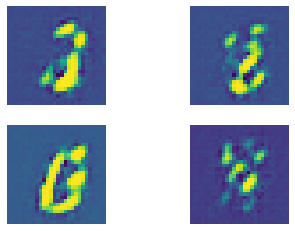

Epoch 36/100
....................................................................................................

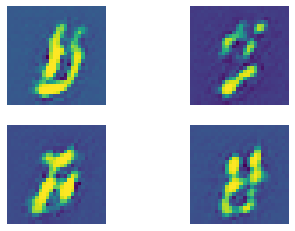

Epoch 37/100
....................................................................................................

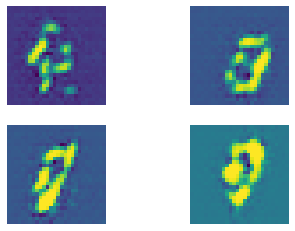

Epoch 38/100
....................................................................................................

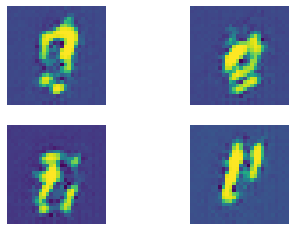

Epoch 39/100
....................................................................................................

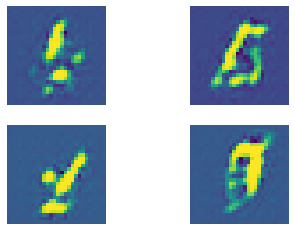

Epoch 40/100
....................................................................................................

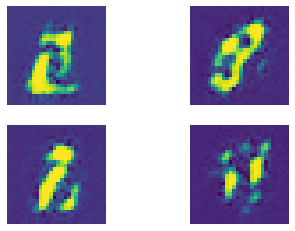

Epoch 41/100
....................................................................................................

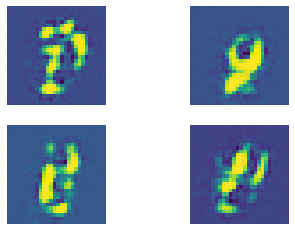

Epoch 42/100
....................................................................................................

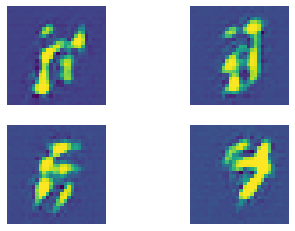

Epoch 43/100
....................................................................................................

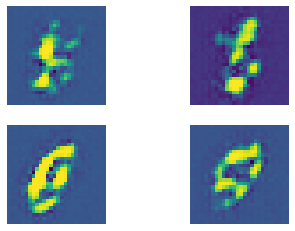

Epoch 44/100
....................................................................................................

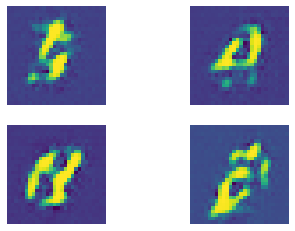

Epoch 45/100
....................................................................................................

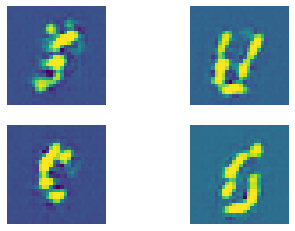

Epoch 46/100
....................................................................................................

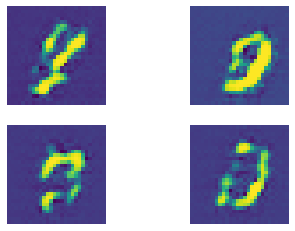

Epoch 47/100
....................................................................................................

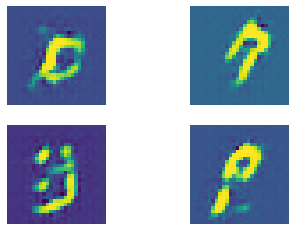

Epoch 48/100
....................................................................................................

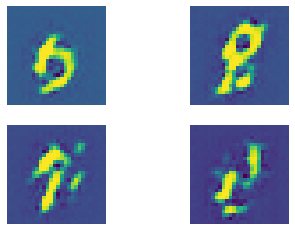

Epoch 49/100
....................................................................................................

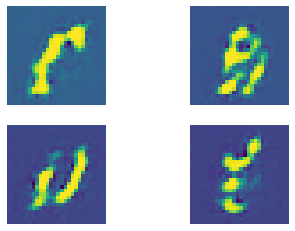

Epoch 50/100
....................................................................................................

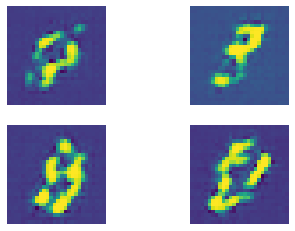

Epoch 51/100
....................................................................................................

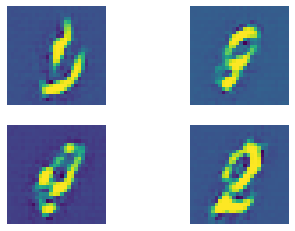

Epoch 52/100
....................................................................................................

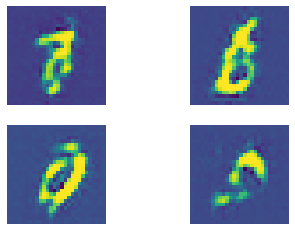

Epoch 53/100
....................................................................................................

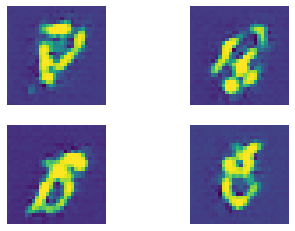

Epoch 54/100
....................................................................................................

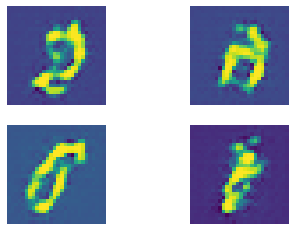

Epoch 55/100
....................................................................................................

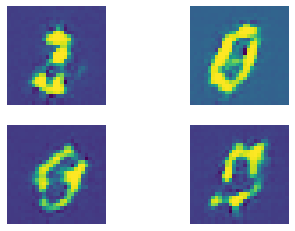

Epoch 56/100
....................................................................................................

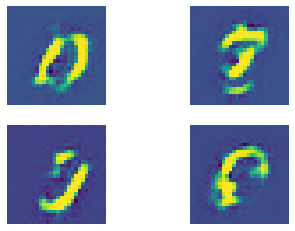

Epoch 57/100
....................................................................................................

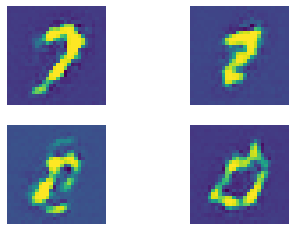

Epoch 58/100
....................................................................................................

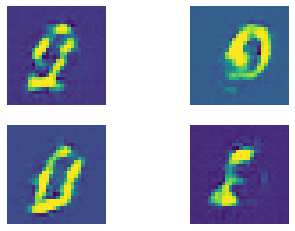

Epoch 59/100
....................................................................................................

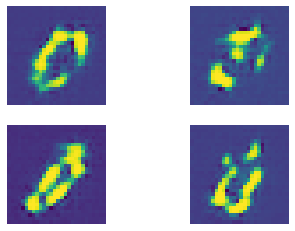

Epoch 60/100
....................................................................................................

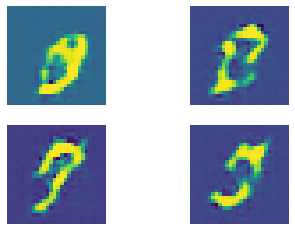

Epoch 61/100
....................................................................

KeyboardInterrupt: ignored

In [99]:
EPOCHS = 100
for epoch in range(EPOCHS):
  generate_images()
  print("Epoch {}/{}".format(epoch+1,EPOCHS))
  for img in dataset.take(100):
    train_step(img)
    print(".",end="")